## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

## Importing Brasil Map

Source: IBGE - Instituto Brasileiro de Geografia e Estatística, ["Downloads"](https://www.ibge.gov.br/geociencias/downloads-geociencias.html), path: cartas_e_mapas > bases_cartograficas_continuas > bcim > versao2016 > geopackage <br>     
Download file: `bcim_2016_21_11_2018.gpkg`

In [2]:
map_brasil = gpd.read_file('./bcim_2016_21_11_2018.gpkg',
                           layer = 'lim_unidade_federacao_a')

map_brasil.columns

Index(['nome', 'nomeabrev', 'geometriaaproximada', 'sigla', 'geocodigo',
       'id_produtor', 'id_elementoprodutor', 'cd_insumo_orgao',
       'nr_insumo_mes', 'nr_insumo_ano', 'tx_insumo_documento', 'geometry'],
      dtype='object')

In [3]:
map_brasil.head()

,nome,nomeabrev,geometriaaproximada,sigla,geocodigo,id_produtor,id_elementoprodutor,cd_insumo_orgao,nr_insumo_mes,nr_insumo_ano,tx_insumo_documento,geometry
0,Goiás,None,Sim,GO,52,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743..."
1,Mato Grosso do Sul,None,Sim,MS,50,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159..."
2,Paraná,None,Sim,PR,41,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903..."
3,Minas Gerais,None,Sim,MG,31,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750..."
4,Sergipe,None,Sim,SE,28,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ..."


Estado: São Paulo


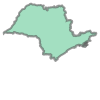

In [ ]:
# Checking one State 
print('Estado: ' + map_brasil.nome[25])
map_brasil.geometry[25]

## Creating the dataset with all States data

In [6]:
data = [['CE', 85, 'Nível 5'],
        ['PR', 73, 'Nível 4'],
        ['ES', 68, 'Nível 3'],
        ['GO', 67, 'Nível 3'],
        ['RO', 65, 'Nível 3'],
        ['RS', 63, 'Nível 3'],
        ['SC', 61, 'Nível 3'],
        ['MG', 60, 'Nível 2'],
        ['PE', 59, 'Nível 2'],
        ['MA', 56, 'Nível 2'],
        ['MT', 55, 'Nível 2'],
        ['AM', 52, 'Nível 2'],
        ['PI', 52, 'Nível 2'],
        ['RJ', 52, 'Nível 2'],
        ['SP', 52, 'Nível 2'],
        ['PB', 51, 'Nível 2'],
        ['PA', 48, 'Nível 1'],
        ['MS', 47, 'Nível 1'],
        ['AL', 44, 'Nível 1'],
        ['TO', 44, 'Nível 1'],
        ['AP', 42, 'Nível 1'],
        ['BA', 37, 'Abaixo do Nível 1'],
        ['RN', 37, 'Abaixo do Nível 1'],
        ['SE', 31, 'Abaixo do Nível 1'],
        ['AC', 0, 'N/A'],
        ['DF', 0, 'N/A'],
        ['RR', 0, 'N/A']
       ]

df = pd.DataFrame(data, 
                  columns =['estado', 'alfabetizacao', 'nivel'])

In [7]:
# Checking the dataset created
df

,estado,alfabetizacao,nivel
0,CE,85,Nível 5
1,PR,73,Nível 4
2,ES,68,Nível 3
3,GO,67,Nível 3
4,RO,65,Nível 3
5,RS,63,Nível 3
6,SC,61,Nível 3
7,MG,60,Nível 2
8,PE,59,Nível 2
9,MA,56,Nível 2


In [8]:
# Adjusting the N/A values in the dataset:
df.at[24, 'nivel'] = np.nan
df.at[25, 'nivel'] = np.nan
df.at[26, 'nivel'] = np.nan

df

,estado,alfabetizacao,nivel
0,CE,85,Nível 5
1,PR,73,Nível 4
2,ES,68,Nível 3
3,GO,67,Nível 3
4,RO,65,Nível 3
5,RS,63,Nível 3
6,SC,61,Nível 3
7,MG,60,Nível 2
8,PE,59,Nível 2
9,MA,56,Nível 2


## Consolidating the info into a single dataset

In [9]:
# Creating copy of the original map dataset
df_info = map_brasil.copy()

In [10]:
# Renaming column for standardization
df_info.rename({'sigla': 'estado'},
               axis = 1,
               inplace = True)

In [11]:
# Merging the datasets

BRASIL = df_info.merge(df, 
                       on = 'estado',
                       how = 'left')

# Checking the desired columns in the consolidated dataset
BRASIL[['estado', 'alfabetizacao', 'nivel', 'geometry']].head()


,estado,alfabetizacao,nivel,geometry
0,GO,67,Nível 3,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743..."
1,MS,47,Nível 1,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159..."
2,PR,73,Nível 4,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903..."
3,MG,60,Nível 2,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750..."
4,SE,31,Abaixo do Nível 1,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ..."


<Axes: >

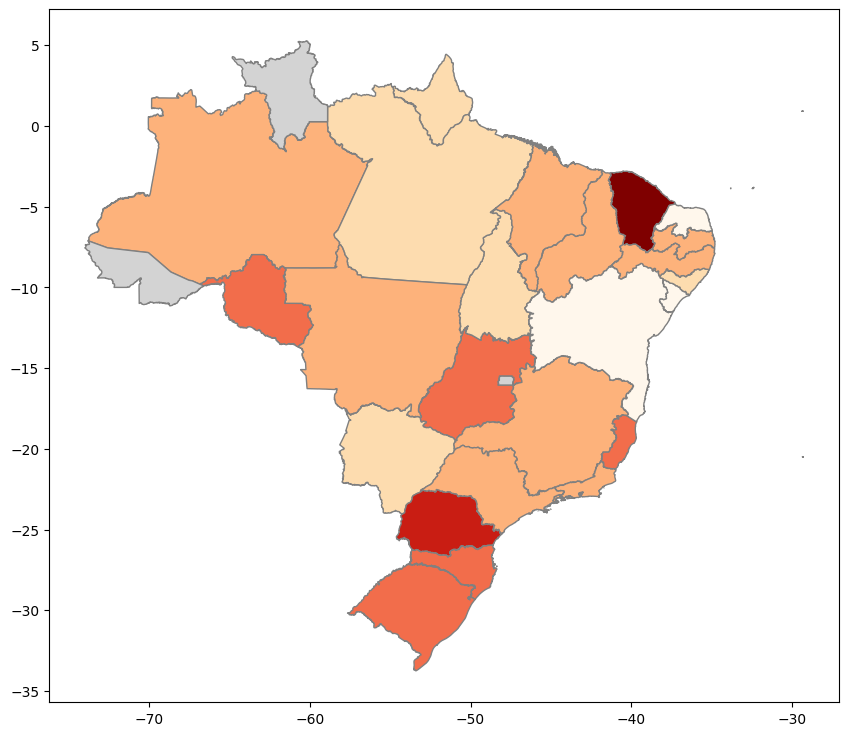

In [16]:
%matplotlib inline

# Plotting

BRASIL.plot(
    column = 'nivel',                    # Column with numeric values of interest
    cmap = 'OrRd',                       # Color palete (alternativelly, explored 'viridis')
    figsize = (13, 9),                   # Size of the image
    legend = False,                      # Legend (True or False)
    edgecolor = 'grey',                  # Borders / edge color
    missing_kwds = {                     # Configuration for Missing values
        "color": "lightgrey",
#       "edgecolor":"red",
#       "hatch":"///",
        "label": "Missing Values"})

## References

**DOCUMENTAÇÃO**
- [GeoPandas - Mapping and plotting tools](https://geopandas.org/en/stable/docs/user_guide/mapping.html)
- [GeoPandas - Adding a scale bar to a matplotlib plot](https://geopandas.org/en/v0.14.0/gallery/matplotlib_scalebar.html)
- [GeoPandas - Documentação](https://geopandas.org/en/stable/docs.html)
- [GeoPandas 0.14.4](https://geopandas.org/en/stable/)
- [Brazilian States Choropleth Map with Python](https://rodrigodutcosky.medium.com/mapas-coropl%C3%A9ticos-com-os-estados-do-brasil-em-python-b9b48c6db585)
- [Differents ways to create a Pandas dataframe](https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/)
- [IBGE - Instituto Brasileiro de Geografia e Estatística](https://www.ibge.gov.br/geociencias/downloads-geociencias.html)
- [COBLIS - Color Blindness Simulator](https://www.color-blindness.com/coblis-color-blindness-simulator/)